In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import urllib 
import os
import sys
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Download Data

In [2]:
def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring1 = '201607'
getCitiBikeCSV(datestring1)
datestring2 = '201601'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


# Data Cleaning, we want to get usage information about one specific station: Lawrence St & Willoughby St

In [4]:
cb201607 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
cb201601 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

In [5]:
cb201607.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
cb201601.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
cb2016 = pd.concat([cb201607,cb201601],ignore_index=True)
len(cb2016)

1889588

In [8]:
cb2016

tripduration           starttime            stoptime  \
0                 704   7/1/2016 00:00:02   7/1/2016 00:11:47   
1                 492   7/1/2016 00:00:18   7/1/2016 00:08:31   
2                 191   7/1/2016 00:00:19   7/1/2016 00:03:31   
3                 687   7/1/2016 00:00:24   7/1/2016 00:11:52   
4                 609   7/1/2016 00:00:31   7/1/2016 00:10:40   
5                 672   7/1/2016 00:00:45   7/1/2016 00:11:57   
6                 466   7/1/2016 00:00:49   7/1/2016 00:08:35   
7                 556   7/1/2016 00:00:51   7/1/2016 00:10:07   
8                 767   7/1/2016 00:00:51   7/1/2016 00:13:39   
9                1442   7/1/2016 00:00:54   7/1/2016 00:24:56   
10                472   7/1/2016 00:00:55   7/1/2016 00:08:48   
11                777   7/1/2016 00:01:04   7/1/2016 00:14:02   
12                306   7/1/2016 00:01:07   7/1/2016 00:06:13   
13               1353   7/1/2016 00:01:08   7/1/2016 00:23:41   
14               1145   7/1/2016 00:01:17   7/1/2016 00:20:23   
15                533   7/1/2016 00:01:45   7/1/2016 00:10:39   
16               1568   7/1/2016 00:01:54   7/1/2016 00:28:03   
17               2199   7/1/2016 00:01:54   7/1/2016 00:38:34   
18                464   7/1/2016 00:01:56   7/1/2016 00:09:41   
19                419   7/1/2016 00:01:59   7/1/2016 00:08:58   
20                511   7/1/2016 00:01:59   7/1/2016 00:10:31   
21                362   7/1/2016 00:02:01   7/1/2016 00:08:04   
22               2229   7/1/2016 00:02:04   7/1/2016 00:39:14   
23                351   7/1/2016 00:02:05   7/1/2016 00:07:57   
24                328   7/1/2016 00:02:11   7/1/2016 00:07:40   
25                659   7/1/2016 00:02:13   7/1/2016 00:13:13   
26               1226   7/1/2016 00:02:20   7/1/2016 00:22:46   
27               1735   7/1/2016 00:02:29   7/1/2016 00:31:24   
28                209   7/1/2016 00:02:31   7/1/2016 00:06:01   
29                492   7/1/2016 00:02:32   7/1/2016 00:10:44   
...               ...                 ...                 ...   
1889558           148  1/31/2016 23:47:56  1/31/2016 23:50:25   
1889559          1333  1/31/2016 23:48:06   2/1/2016 00:10:20   
1889560           297  1/31/2016 23:48:33  1/31/2016 23:53:31   
1889561           438  1/31/2016 23:48:41  1/31/2016 23:55:59   
1889562           146  1/31/2016 23:48:54  1/31/2016 23:51:21   
1889563           785  1/31/2016 23:49:14   2/1/2016 00:02:20   
1889564           337  1/31/2016 23:49:22  1/31/2016 23:55:00   
1889565          1066  1/31/2016 23:49:47   2/1/2016 00:07:34   
1889566           952  1/31/2016 23:49:52   2/1/2016 00:05:44   
1889567          2164  1/31/2016 23:51:00   2/1/2016 00:27:04   
1889568           215  1/31/2016 23:51:36  1/31/2016 23:55:11   
1889569           514  1/31/2016 23:53:49   2/1/2016 00:02:23   
1889570           464  1/31/2016 23:54:08   2/1/2016 00:01:52   
1889571          1587  1/31/2016 23:54:09   2/1/2016 00:20:36   
1889572           440  1/31/2016 23:54:40   2/1/2016 00:02:00   
1889573           495  1/31/2016 23:55:02   2/1/2016 00:03:18   
1889574           294  1/31/2016 23:55:16   2/1/2016 00:00:10   
1889575           614  1/31/2016 23:56:26   2/1/2016 00:06:40   
1889576           141  1/31/2016 23:56:28  1/31/2016 23:58:49   
1889577           218  1/31/2016 23:56:32   2/1/2016 00:00:10   
1889578           224  1/31/2016 23:56:41   2/1/2016 00:00:25   
1889579           858  1/31/2016 23:56:43   2/1/2016 00:11:01   
1889580           533  1/31/2016 23:57:16   2/1/2016 00:06:10   
1889581           492  1/31/2016 23:57:50   2/1/2016 00:06:03   
1889582           326  1/31/2016 23:57:59   2/1/2016 00:03:26   
1889583          1275  1/31/2016 23:58:20   2/1/2016 00:19:36   
1889584          1576  1/31/2016 23:58:39   2/1/2016 00:24:55   
1889585           356  1/31/2016 23:58:54   2/1/2016 00:04:51   
1889586          1128  1/31/2016 23:59:13   2/1/2016 00:18:02   
1889587           851  1/31/2016 23:59:26   

In [9]:
cb2016_out = cb2016[cb2016['start station name']=='Lawrence St & Willoughby St']
cb2016_in = cb2016[cb2016['end station name']=='Lawrence St & Willoughby St']

In [10]:
cb2016_out.loc[:,'hour'] = pd.to_datetime(cb2016_out.starttime).dt.hour
cb2016_in.loc[:,'hour'] = pd.to_datetime(cb2016_in.stoptime).dt.hour

/Users/cihe/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cihe/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
cb2016_out.head()

tripduration          starttime           stoptime  start station id  \
43             662  7/1/2016 00:04:13  7/1/2016 00:15:16               323   
167            145  7/1/2016 00:14:43  7/1/2016 00:17:08               323   
424            327  7/1/2016 00:41:54  7/1/2016 00:47:21               323   
980            336  7/1/2016 02:49:36  7/1/2016 02:55:12               323   
1179           142  7/1/2016 04:44:30  7/1/2016 04:46:53               323   

               start station name  start station latitude  \
43    Lawrence St & Willoughby St               40.692362   
167   Lawrence St & Willoughby St               40.692362   
424   Lawrence St & Willoughby St               40.692362   
980   Lawrence St & Willoughby St               40.692362   
1179  Lawrence St & Willoughby St               40.692362   

      start station longitude  end station id             end station name  \
43                 -73.986317             399  Lafayette Ave & St James Pl   
167                -73.986317             310          State St & Smith St   
424                -73.986317             157      Henry St & Atlantic Ave   
980                -73.986317             270      Adelphi St & Myrtle Ave   
1179               -73.986317            3232          Bond St & Fulton St   

      end station latitude  end station longitude  bikeid    usertype  \
43               40.688515             -73.964763   17325  Subscriber   
167              40.689269             -73.989129   19376  Subscriber   
424              40.690893             -73.996123   17229  Subscriber   
980              40.693083             -73.971789   16468  Subscriber   
1179             40.689622             -73.983043   18405  Subscriber   

      birth year  gender  hour  
43        1980.0       2     0  
167       1972.0       1     0  
424       1986.0       1     0  
980       1988.0       1     2  
1179      1955.0       1     4

In [12]:
cb2016_out =cb2016_out.groupby(['hour']).count()
cb2016_in = cb2016_in.groupby(['hour']).count()

# get inbound trip count and outbound trip count, and we use inbound trip count minus outbound trip count to get average balance change

In [13]:
cb2016_out.rename(columns={"tripduration": "outtrip"},inplace = True)
cb2016_in.rename(columns={"tripduration": "intrip"},inplace = True)

In [14]:
cb2016_out.drop([u'starttime', u'stoptime',u'start station id', 'start station name',
                 u'start station latitude',u'start station longitude', u'end station id', 'end station name',
                 u'end station latitude', u'end station longitude',u'bikeid', u'usertype',
                 u'birth year', u'gender'], axis = 1, inplace = True)
cb2016_in.drop([u'starttime', u'stoptime',u'start station id', 'start station name',
                 u'start station latitude',u'start station longitude', u'end station id', 'end station name',
                 u'end station latitude', u'end station longitude',u'bikeid', u'usertype',
                 u'birth year', u'gender'], axis = 1, inplace = True)

In [15]:
cb2016_in.reset_index(inplace=True)
cb2016_out.reset_index(inplace=True)

merge all data into one dataframe and average the trip counts, also calculate average hourly balance

In [16]:
station_usage = cb2016_out.merge(cb2016_in, on='hour')
station_usage['outtrip'] = station_usage['outtrip'] / 62
station_usage['intrip'] = station_usage['intrip'] / 62
station_usage['balance'] = station_usage.intrip - station_usage.outtrip
station_usage

hour   outtrip    intrip   balance
0      0  0.580645  0.451613 -0.129032
1      1  0.258065  0.129032 -0.129032
2      2  0.193548  0.129032 -0.064516
3      3  0.064516  0.048387 -0.016129
4      4  0.145161  0.193548  0.048387
5      5  0.193548  0.225806  0.032258
6      6  0.129032  1.403226  1.274194
7      7  1.032258  1.677419  0.645161
8      8  2.483871  6.209677  3.725806
9      9  1.758065  6.193548  4.435484
10    10  1.354839  2.354839  1.000000
11    11  1.500000  1.822581  0.322581
12    12  2.209677  2.161290 -0.048387
13    13  2.048387  2.209677  0.161290
14    14  2.403226  2.048387 -0.354839
15    15  2.419355  2.161290 -0.258065
16    16  3.370968  1.870968 -1.500000
17    17  5.048387  2.177419 -2.870968
18    18  5.887097  2.806452 -3.080645
19    19  3.612903  2.177419 -1.435484
20    20  2.645161  1.887097 -0.758065
21    21  1.580645  1.145161 -0.435484
22    22  1.096774  1.225806  0.129032
23    23  0.919355  0.838710 -0.080645

# Plot average inbound trip, outbound trip and balance change in different hours of the day

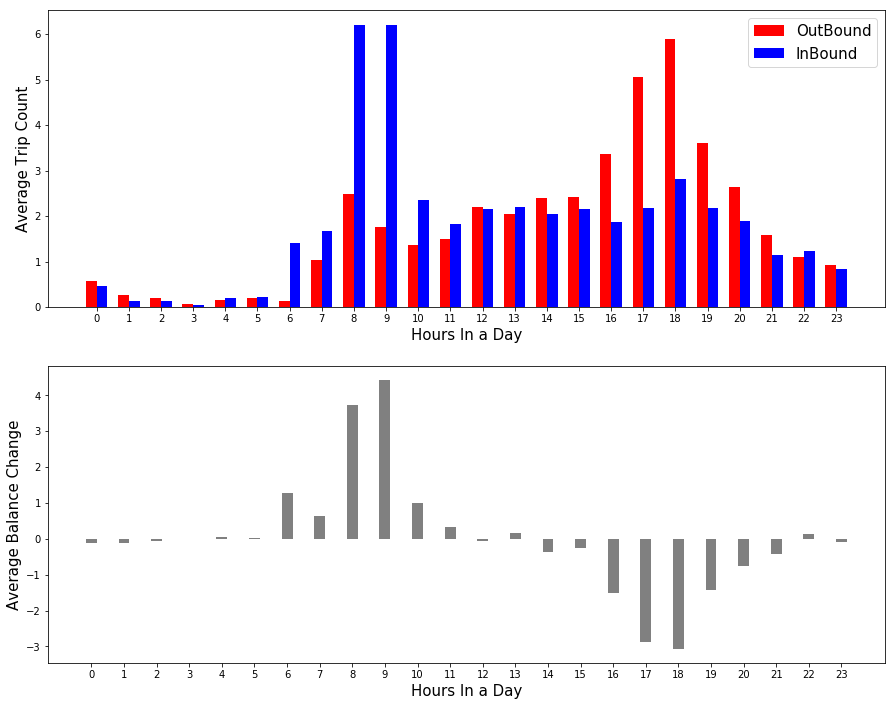

In [17]:
indices = station_usage.hour
#Calculate optimal width
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(211)
ax1.bar(indices-width/2,station_usage.outtrip,width,color='r',label='OutBound')
ax1.bar(indices+width/2,station_usage.intrip,width,color='b',label='InBound')
ax1.set_xlabel('Hours In a Day',fontsize=15)
ax1.set_ylabel('Average Trip Count',fontsize=15)
ax1.set_xticks(station_usage.hour)
#ax1.set_title('CitiBike Lawrence St & Willoughby St July,2016&Jan,2016 Average In&Out Amount',fontsize=18)
ax1.legend(fontsize=15)

ax2 = fig.add_subplot(212)
ax2.bar(indices,station_usage.balance,width,color='grey',label='Bike Balance Change')
ax2.set_xlabel('Hours In a Day',fontsize=15)
ax2.set_xticks(station_usage.hour)
ax2.set_ylabel('Average Balance Change',fontsize=15)
#ax2.set_title('CitiBike Lawrence St & Willoughby St 201607&201601 Average Balance Change',fontsize=18)
#ax2.legend(fontsize=20)

plt.show()

# Figure1:CitiBike Lawrence St & Willoughby St July & Jan,2016 Average Hourly In&Out Trip-Count and Balance Change

We can see from the plots, there is an obvious usage pattern on this CitiBike Station: more inbound bikes in the morning(especially at 8&9 o'clock) while more outbound bikes in the afternoon(5pm&6pm). Since the station sits right next to our school location and many other offices, this result can be explained by people using CitiBike to get to school/work in the morning and to get back home in the evening.